<a href="https://colab.research.google.com/github/amymariam/Pneumonia_Detection/blob/main/Pneumonia_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mounting Drive and Importing Necessary Libraries**

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Mounted at /content/drive/


In [3]:
IMAGE_SIZE=[224,224]
train_path="/content/drive/MyDrive/Colab Notebooks/chest_xray/train"
test_path="/content/drive/MyDrive/Colab Notebooks/chest_xray/test"

In [4]:
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [5]:
for layer in vgg.layers:
  layer.trainable = False

In [6]:
folders=glob("/content/drive/MyDrive/Colab Notebooks/chest_xray/train/*")

In [7]:
folders

['/content/drive/MyDrive/Colab Notebooks/chest_xray/train/PNEUMONIA',
 '/content/drive/MyDrive/Colab Notebooks/chest_xray/train/NORMAL']

In [8]:
x=Flatten()(vgg.output)

In [9]:
prediction=Dense(len(folders),activation='softmax')(x)
model=Model(inputs=vgg.input,outputs=prediction)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

**Data Augmentation**

In [12]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
training_set=train_datagen.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/chest_xray/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 5216 images belonging to 2 classes.


In [14]:
test_set=test_datagen.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/chest_xray/test",
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 634 images belonging to 2 classes.


In [15]:
r=model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=5,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

<ipython-input-15-4e2b7d5ab35f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r=model.fit_generator(


Epoch 1/5
163/163 [==============================] - 1362s 8s/step - loss: 0.2006 - accuracy: 0.9231 - val_loss: 0.3661 - val_accuracy: 0.8754
Epoch 2/5
163/163 [==============================] - 122s 746ms/step - loss: 0.1079 - accuracy: 0.9594 - val_loss: 0.4945 - val_accuracy: 0.8596
Epoch 3/5
163/163 [==============================] - 124s 761ms/step - loss: 0.0940 - accuracy: 0.9645 - val_loss: 0.3290 - val_accuracy: 0.9022
Epoch 4/5
163/163 [==============================] - 122s 748ms/step - loss: 0.0968 - accuracy: 0.9632 - val_loss: 0.2788 - val_accuracy: 0.9038
Epoch 5/5
163/163 [==============================] - 124s 763ms/step - loss: 0.0779 - accuracy: 0.9707 - val_loss: 0.4331 - val_accuracy: 0.8943


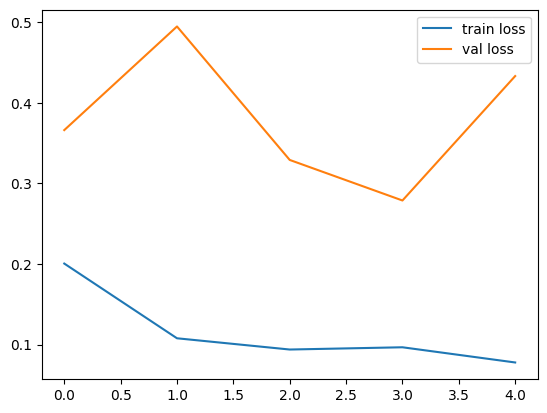

<Figure size 640x480 with 0 Axes>

In [16]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('lossVal_loss')

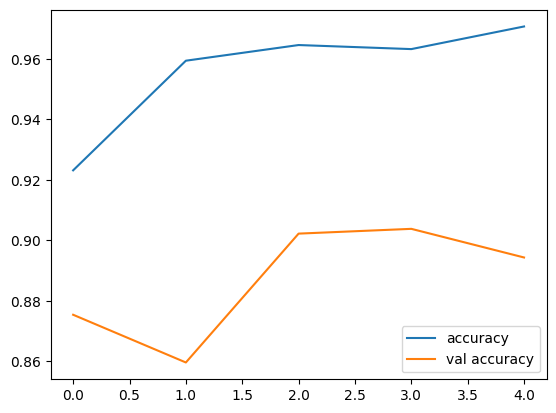

<Figure size 640x480 with 0 Axes>

In [17]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('lossVal_loss')

In [18]:
model.save('my_vgg16_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Testing the model

In [19]:
from tensorflow.keras.models import load_model

In [20]:
model = load_model('my_vgg16_model.h5')

In [21]:
img_to_val=image.load_img("/content/drive/MyDrive/Colab Notebooks/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg",target_size=(224,224))

In [22]:
y=image.img_to_array(img_to_val)

In [23]:
y=np.expand_dims(y,axis=0)
res=preprocess_input(y)
classes=model.predict(res)

1/1 [==============================] - 1s 773ms/step


In [24]:
predicted_class = np.argmax(classes, axis=1)
if predicted_class==0:
  print("Predicted Class: NORMAL")
else:
  print("Predicted Class: PNEUMONIA")

Predicted Class: NORMAL
